Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
(X_train, Y_train),(X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

Show Image

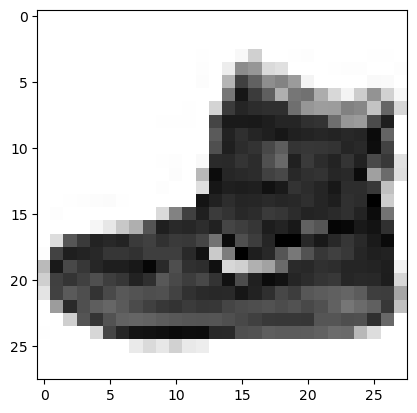

In [5]:
plt.imshow(X_train[0], cmap='Greys')

In [6]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

Change Dimention

In [7]:
X_train.ndim

3

In [8]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [9]:
X_train.ndim

4

In [10]:
X_train.shape

(60000, 28, 28, 1)

Feature Scaling

In [11]:
X_train = X_train/255
X_test = X_test/255

Split Dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=2020)

In [13]:
print(X_train.shape, Y_train.shape)

(48000, 28, 28, 1) (48000,)


In [14]:
print(X_val.shape, Y_val.shape)

(12000, 28, 28, 1) (12000,)


CNN Model

In [15]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

2023-03-12 14:52:11.135863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X_train,Y_train,epochs=10, batch_size=512,verbose=1, validation_data=(X_val,Y_val))

Epoch 1/10
94/94 [==============================] - 4s 44ms/step - loss: 0.6409 - accuracy: 0.7824 - val_loss: 0.4359 - val_accuracy: 0.8473
Epoch 2/10
94/94 [==============================] - 4s 44ms/step - loss: 0.3705 - accuracy: 0.8716 - val_loss: 0.3710 - val_accuracy: 0.8678
Epoch 3/10
94/94 [==============================] - 4s 42ms/step - loss: 0.3248 - accuracy: 0.8861 - val_loss: 0.3262 - val_accuracy: 0.8867
Epoch 4/10
94/94 [==============================] - 4s 41ms/step - loss: 0.2957 - accuracy: 0.8963 - val_loss: 0.3101 - val_accuracy: 0.8903
Epoch 5/10
94/94 [==============================] - 4s 41ms/step - loss: 0.2745 - accuracy: 0.9029 - val_loss: 0.3027 - val_accuracy: 0.8932
Epoch 6/10
94/94 [==============================] - 4s 41ms/step - loss: 0.2589 - accuracy: 0.9075 - val_loss: 0.2885 - val_accuracy: 0.9008
Epoch 7/10
94/94 [==============================] - 4s 41ms/step - loss: 0.2474 - accuracy: 0.9104 - val_loss: 0.2868 - val_accuracy: 0.8988
Epoch 8/10
94

Test the model

In [19]:
model.predict(np.expand_dims(X_test[0], axis=0)).round(2)

1/1 [==============================] - 0s 45ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [20]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

1/1 [==============================] - 0s 11ms/step


9

In [21]:
Y_test[0]

9

In [22]:
y_predict=model.predict(X_test).round(2)
y_predict

313/313 [==============================] - 0s 1ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.03, 0.02, 0.  ]], dtype=float32)

In [23]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2670 - accuracy: 0.9045


[0.26698052883148193, 0.9045000076293945]

Visualize Output

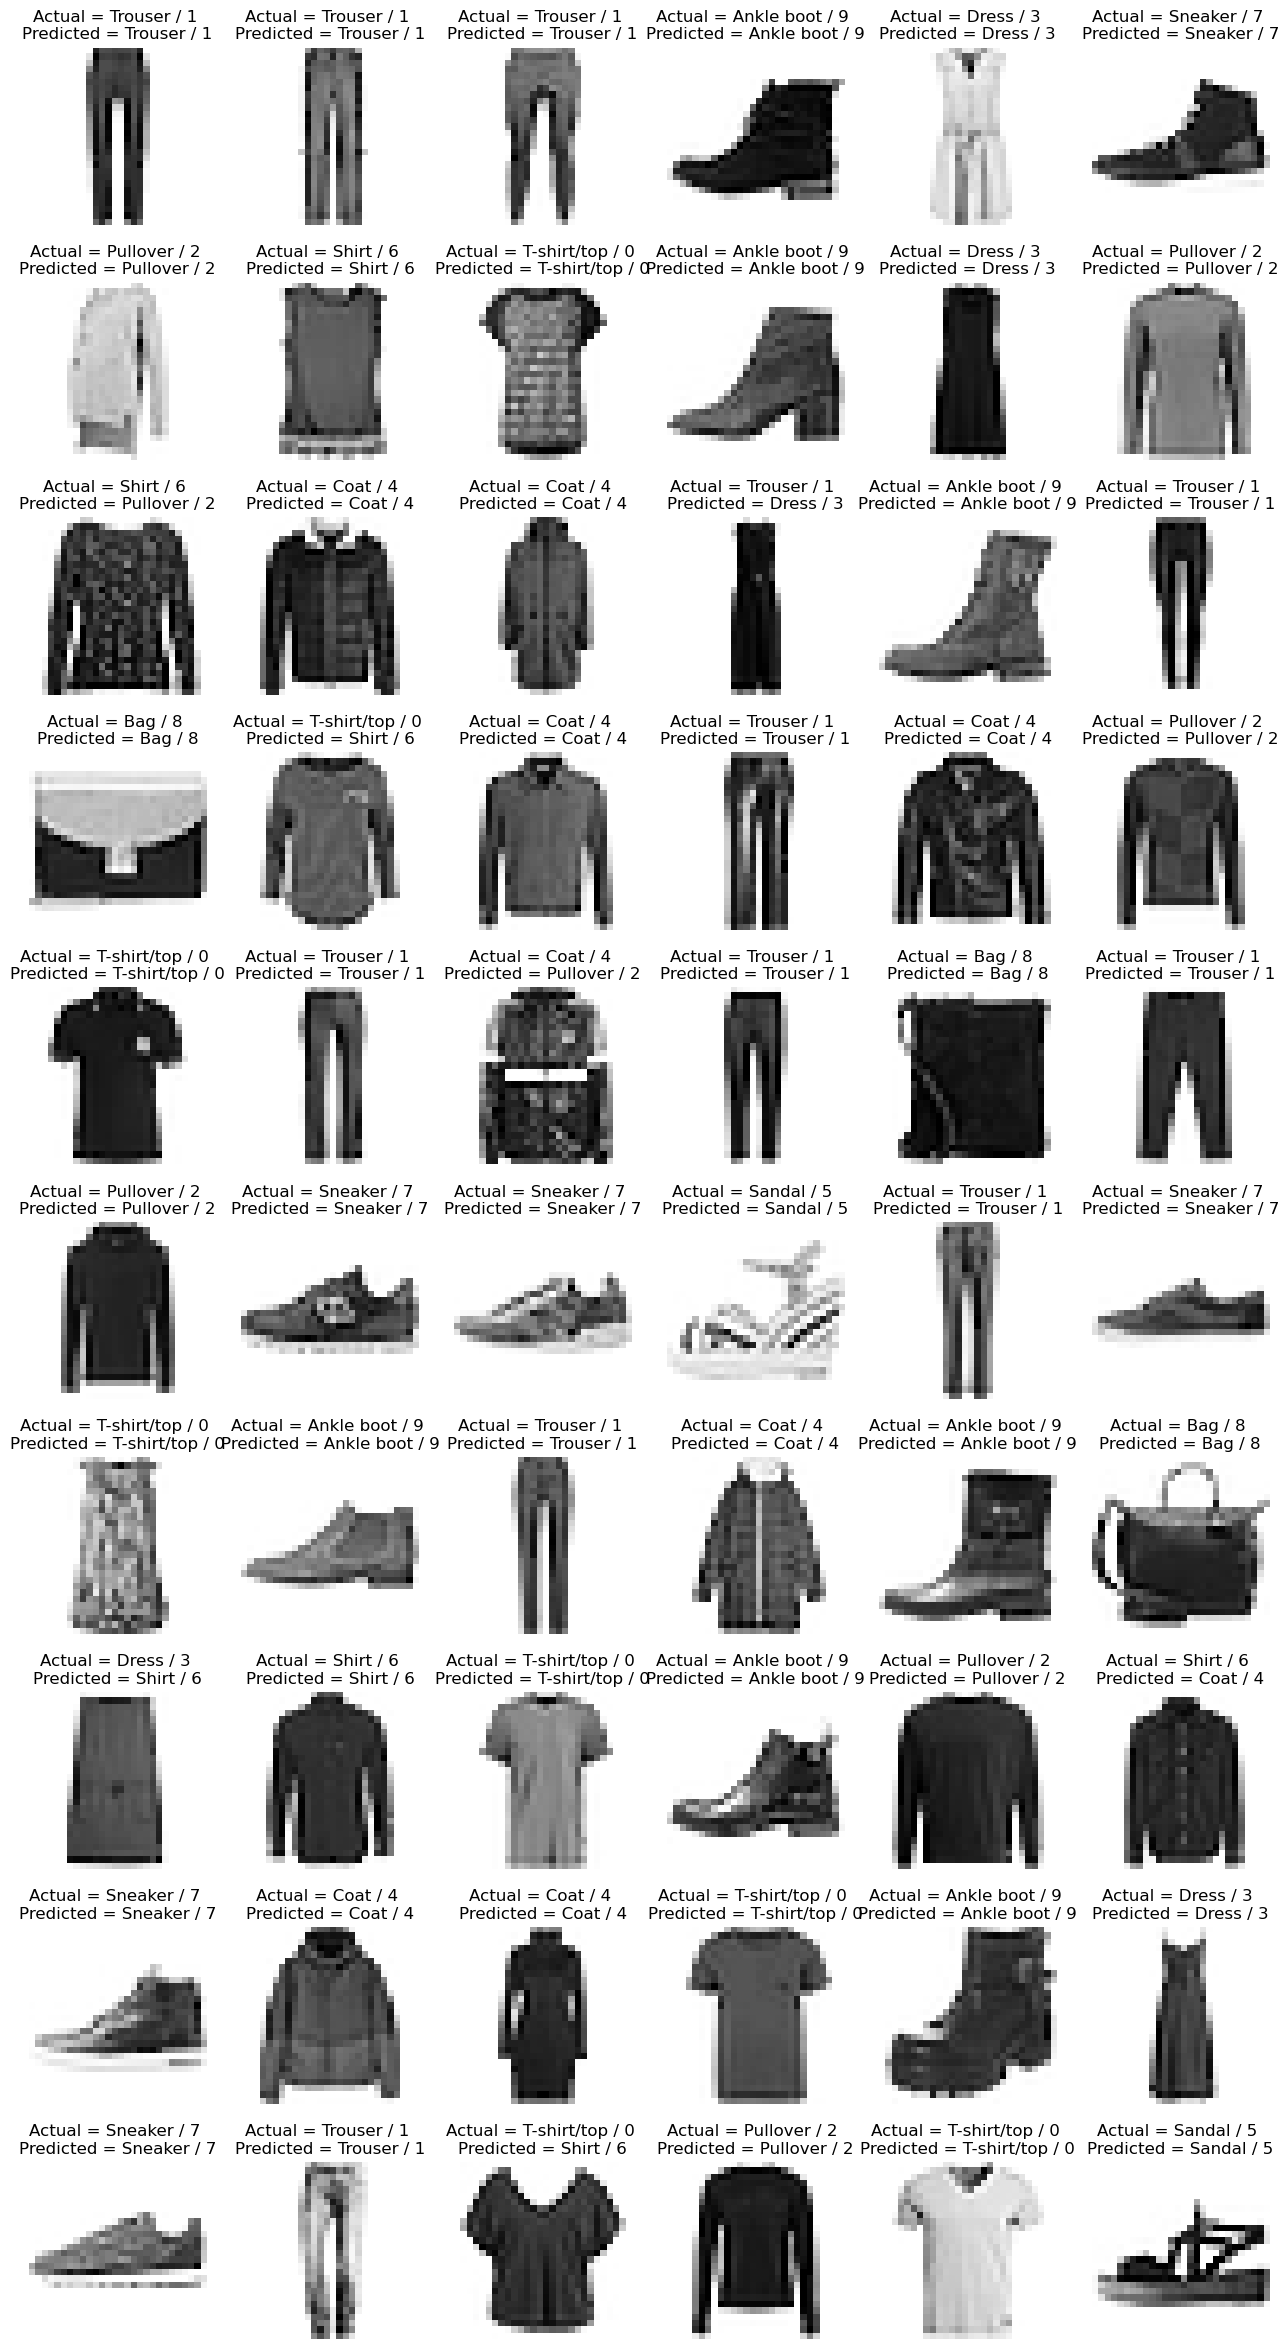

In [24]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(1,1000,60):
    plt.subplot(10,6,j); j+=1
    plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[Y_test[i]],Y_test[i],class_labels[np.argmax(y_predict[i])],np.argmax(y_predict[i])))
    plt.axis('off')

Confusion Matrix

<AxesSubplot:>

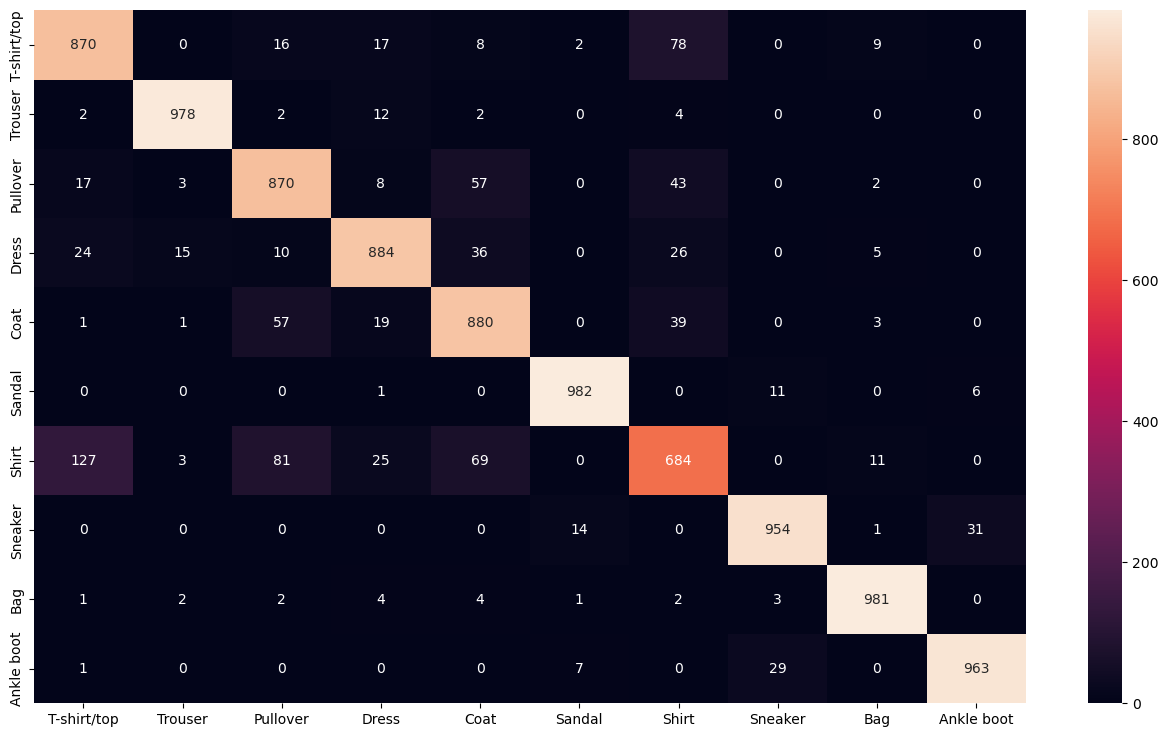

In [25]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_predict ]
cm = confusion_matrix(Y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [26]:
from sklearn.metrics import classification_report
cr= classification_report(Y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.84      0.87      0.85      1000
       Dress       0.91      0.88      0.90      1000
        Coat       0.83      0.88      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.78      0.68      0.73      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Save model

In [27]:
model.save('model_cnn.h5')

In [28]:
# load a model
model_deploy = keras.models.load_model('model_cnn.h5')

In [29]:
model_deploy.predict(X_test).round(2)

313/313 [==============================] - 0s 1ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.03, 0.02, 0.  ]], dtype=float32)

In [30]:
model_deploy.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 12ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [31]:
np.argmax(model_deploy.predict(np.expand_dims(X_test[0],axis=0)))

1/1 [==============================] - 0s 12ms/step


9